# 💡Telecom X: Análisis de Evasión de Clientes



> Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

> Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.




#📌 Extracción

In [77]:
# importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os

In [78]:
# Carga de datos
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()

In [79]:
# Conversión de datos a DataFrame

df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [80]:
# Expansión de columnas
nested_data_col = ['customer', 'phone', 'internet', 'account']

for col in nested_data_col:

    df[col] = df[col].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
    df[col] = df[col].apply(lambda x: {} if pd.isna(x) else x)

    nestedData = pd.json_normalize(df[col])
    nestedData.columns = [f"{col}_{subcol}".lower().replace(' ', '_') for subcol in nestedData.columns]


    df = pd.concat([df.drop(columns=[col]), nestedData], axis=1)

# Normaliza nombres de columnas finales
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [81]:
df.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges.monthly,account_charges.total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [82]:
# Visualiza el número de filas y columnas
filas = df.shape[0]
columnas = df.shape[1]

print(f"El DataFrame tiene {filas} filas y {columnas} columnas.")

El DataFrame tiene 7267 filas y 21 columnas.


In [83]:
# Visualiza el nombre de las columnas

df.columns

Index(['customerid', 'churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       'account_charges.monthly', 'account_charges.total'],
      dtype='object')

In [84]:
# Cambia los valores de la columa 'churn'

if 'churn' in df.columns:
    df['churn'] = df['churn'].map({'Yes': 'Canceló' , 'No': 'Retenido'})
    print('cambios realizados')
else:
    print('columna no encontrada')

cambios realizados


In [85]:
# Cambia los valores en la columna 'customer_seniorcitizen'

if 'customer_seniorcitizen' in df.columns:
    df['customer_seniorcitizen'] = df['customer_seniorcitizen'].map({0: 'No', 1: 'Si'})
    print('cambios realizados')
else:
    print('columna no encontrada')

cambios realizados


In [86]:
# Cambia los valores de las columnas booleanas
col_booleanas = [
    'account_paperlessbilling', 'customer_dependents', 'customer_partner',
    'internet_onlinesecurity', 'internet_onlinebackup', 'internet_deviceprotection',
    'internet_techsupport', 'internet_streamingtv', 'internet_streamingmovies',
    'phone_phoneservice', 'phone_multiplelines'
]

for col in col_booleanas:
    df[col] = df[col].map({'No': 'No', 'Yes': 'Si'})

print('cambios realizados')

cambios realizados


In [87]:
#Revisar los cambios
df.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges.monthly,account_charges.total
0,0002-ORFBO,Retenido,Female,No,Si,Si,9,Si,No,DSL,...,Si,No,Si,Si,No,One year,Si,Mailed check,65.6,593.3
1,0003-MKNFE,Retenido,Male,No,No,No,9,Si,Si,DSL,...,No,No,No,No,Si,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Canceló,Male,No,No,No,4,Si,No,Fiber optic,...,No,Si,No,No,No,Month-to-month,Si,Electronic check,73.9,280.85
3,0011-IGKFF,Canceló,Male,Si,Si,No,13,Si,No,Fiber optic,...,Si,Si,No,Si,Si,Month-to-month,Si,Electronic check,98.0,1237.85
4,0013-EXCHZ,Canceló,Female,Si,Si,No,3,Si,No,Fiber optic,...,No,No,Si,Si,No,Month-to-month,Si,Mailed check,83.9,267.4


In [88]:
# eliminación de valores nulos
#df = df.dropna()

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7043 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   object 
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        6560 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    5686 non-null   object 
 11  internet_onlinebackup      5686 non-null   object 
 12  internet_deviceprotection  5686 non-null   object 
 13  internet_techsupport       5686 non-null   objec

#📊 Carga y análisis

## Distribución de evasión

/tmp/ipython-input-1850291503.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


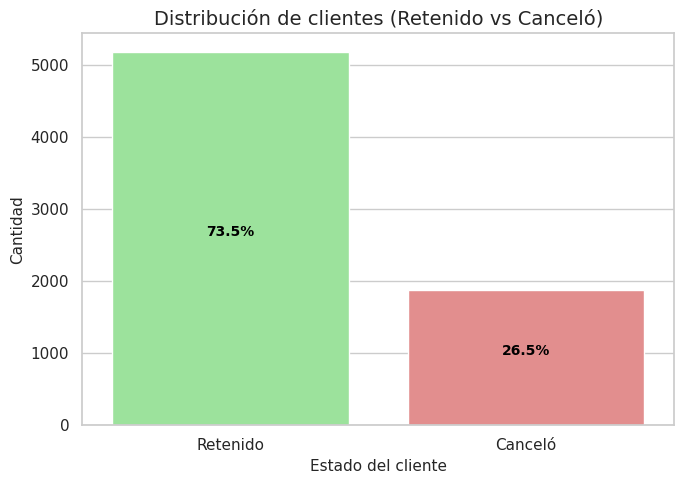

In [90]:
#Distribución de evasión (churn)

orden = ['Retenido', 'Canceló']

#Calcular las proporciones
proporcion = df['churn'].value_counts(normalize=True) * 100
proporcion = proporcion.round(1)

#crear gráfico
plt.figure(figsize=(7,5))
ax = sns.countplot(
    x = 'churn',
    data = df,
    palette = ["#90ee90", "#f08080"],
    order = orden
)

#Títulos y ejes
plt.title('Distribución de clientes (Retenido vs Canceló)', fontsize=14)
plt.xlabel('Estado del cliente', fontsize=11)
plt.ylabel("Cantidad", fontsize=11)

#Mostrar porcentajes dentro de cada barra
total_count = len(df['churn'].dropna()) # Get the total count of non-null values

for p in ax.patches:
    height = p.get_height()
    porcentaje = (height / total_count) * 100
    ax.annotate(f'{porcentaje:.1f}%',
                (p.get_x() + p.get_width() / 2., height / 2), # position the text in the middle of the bar
                ha='center', va='center',
                fontsize=10, color='black',
                weight='bold', xytext=(0, 5),
                textcoords='offset points')
plt.tight_layout()
plt.show()

## Recuento de evasión por variables categóricas

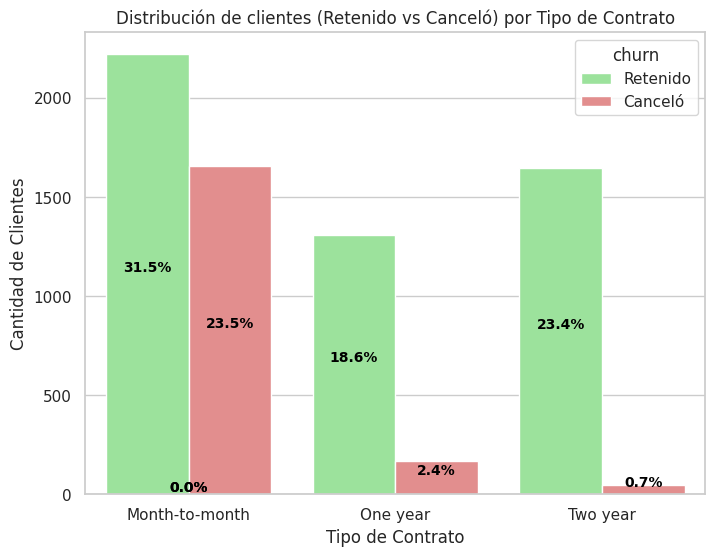

In [91]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='account_contract', hue='churn', palette=["#90ee90", "#f08080"],
                   order=['Month-to-month', 'One year', 'Two year']) # Added order parameter
plt.title('Distribución de clientes (Retenido vs Canceló) por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')

#Mostrar porcentajes dentro de cada barra
total_count = len(df['churn'].dropna()) # Get the total count of non-null values

for p in ax.patches:
    height = p.get_height()
    porcentaje = (height / total_count) * 100
    ax.annotate(f'{porcentaje:.1f}%',
                (p.get_x() + p.get_width() / 2., height / 2), # position the text in the middle of the bar
                ha='center', va='center',
                fontsize=10, color='black',
                weight='bold', xytext=(0, 5),
                textcoords='offset points')

plt.show()

## Distribución KDE

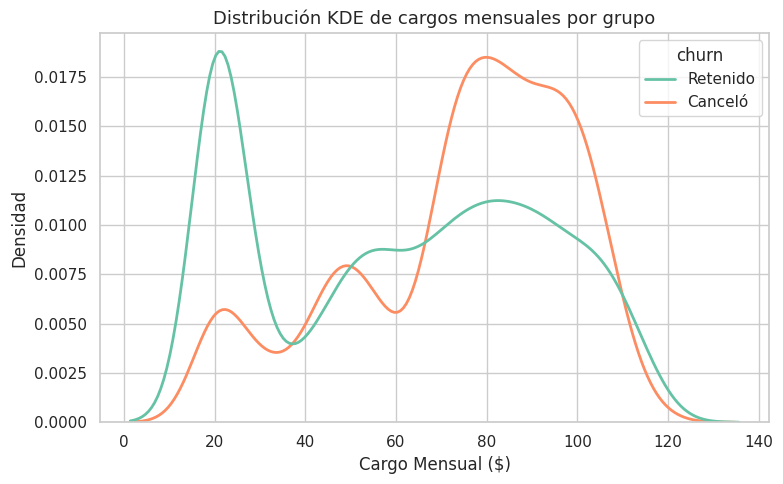

In [92]:
# Estilo general
sns.set(style="whitegrid")

# 2. Gráfico KDE (solo líneas)
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=df,
    x="account_charges.monthly",
    hue="churn",
    fill=False,
    common_norm=False,
    palette="Set2",
    linewidth=2
)
plt.title("Distribución KDE de cargos mensuales por grupo", fontsize=13)
plt.xlabel("Cargo Mensual ($)")
plt.ylabel("Densidad")
plt.tight_layout()
plt.show()

#📄Informe final

### Resumen sobre la Deserción de Clientes en Telecom X

1. Contratos como Factor Clave:
  * Los usuarios con contratos mensuales tienen una probabilidad mucho mayor

2. Formas de pago y su relación con la cancelación:

  * Se observa que quienes pagan mediante tarjetas electrónicas o sistemas automáticos tienden a cancelar con más frecuencia. Esto podría indicar que estos clientes tienen menor sensación de control o compromiso con el servicio.

3. Costos Mensuales y Cancelación
  * Los clientes cuyo pago mensual excede los $90 muestran una mayor inclinación a terminar su contrato, lo que podría reflejar una percepción negativa respecto al costo frente a los beneficios.

4. Uso de Facturación Electrónica
  * Hay un leve incremento en la tasa de cancelación entre usuarios que optan por la facturación electrónica, probablemente vinculado a problemas de usabilidad o confusión con los cargos.

5. Influencia de Factores Personales
  * Aspectos como el estado civil y la existencia de dependientes parecen tener un efecto pequeño, señalando que los clientes con lazos familiares tienden a mantener el servicio por más tiempo.

*Sugerencias Estratégicas:*

Promover contratos a largo plazo mediante beneficios para fidelizar a los clientes. Optimizar los canales de pago electrónico para aumentar la confianza y vínculo con los usuarios. Evaluar y ajustar la política de precios para que sea más atractiva y justa, especialmente para clientes con cargos elevados. Mejorar la plataforma y comunicación de la facturación electrónica para que sea más intuitiva y transparente. Desarrollar campañas específicas orientadas a segmentos con familias o dependientes para fortalecer su lealtad.